# `Business Problem`

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

Columns:

1-url :(contains the url of the restaurant in the zomato website)

2-address :contains the address of the restaurant in Bengaluru

3-name :contains the name of the restaurant

4-online_order :whether online ordering is available in the restaurant or not

5-book_table :table book option available or not

6-rate :contains the overall rating of the restaurant out of 5

7-votes :contains total number of rating for the restaurant as of the above mentioned date

8-phone :contains the phone number of the restaurant

9-location :contains the neighborhood in which the restaurant is located

10-rest_type :restaurant type

11-dish_liked :dishes people liked in the restaurant

12-cuisines :food styles, separated by comma

13-approx_cost(for two people) :contains the approximate cost for meal for two people

14-reviews_list :list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer

15-menu_item :contains list of menus available in the restaurant

16-listed_in(type):type of meal

17-listed_in(city) :contains the neighborhood in which the restaurant is listed

## Import Packages

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import plotly.express as px
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler , RobustScaler
from category_encoders import BinaryEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score , f1_score
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import joblib as jb

## Read Data

In [455]:
df = pd.read_csv('zomato.csv')
df.sample(5)

url  \
46545  https://www.zomato.com/bangalore/parinitha-bir...   
18710  https://www.zomato.com/bangalore/cafe-terra-in...   
32281  https://www.zomato.com/bangalore/muthashys-btm...   
26232  https://www.zomato.com/bangalore/degchi-restau...   
13165  https://www.zomato.com/bangalore/kerala-foods-...   

                                                 address  \
46545  Near Raheja Apartment. Behind Sangeeta Mobile,...   
18710  846, Double Road, 1st stage, Indiranagar, Bang...   
32281  3, Brindavan Complex, 20th Main, Maruthi Nagar...   
26232  1057, Behind More Store, Banaswadi Road, Banas...   
13165  3, 8th Main, Behind Ayappa Temple, Vasanth Nag...   

                           name online_order book_table    rate  votes  \
46545  Parinitha Biryani Corner          Yes         No  3.3 /5      5   
18710                Cafe Terra          Yes         No   4.2/5    391   
32281                Muthashy's          Yes         No  4.2 /5    469   
26232         Degchi Restaurant           No         No  3.7 /5    103   
13165              Kerala Foods           No         No   3.5/5     10   

                                  phone       location      rest_type  \
46545                    +91 8296252622    Magadi Road    Quick Bites   
18710                      080 41631800    Indiranagar           Cafe   
32281    080 42274488\r\n+91 9844162560            BTM    Quick Bites   
26232    +91 9845378523\n+91 7019432524      Banaswadi  Casual Dining   
13165  +91 9916871860\r\n+91 9900190725  Vasanth Nagar    Quick Bites   

                                              dish_liked  \
46545                                                NaN   
18710  English Breakfast, Waffles, Chicken Lasagne, P...   
32281  Fish, Appam, Egg Roast, Kadala Curry, Chicken ...   
26232  Aloo Paratha, Highway Chicken, Amritsari Kulch...   
13165                                                NaN   

                            cuisines approx_cost(for two people)  \
46545                 Biryani, Kebab                         300   
18710   Cafe, Continental, Fast Food                         500   
32281  Kerala, South Indian, Chinese                         400   
26232                   North Indian                         600   
13165                         Kerala                         250   

                                            reviews_list  \
46545                                                 []   
18710  [('Rated 4.0', "RATED\n  Went to this place fo...   
32281  [('Rated 4.0', 'RATED\n  Typical Kerala cusine...   
26232  [('Rated 1.0', "RATED\n  Worst service. Took a...   
13165  [('Rated 5.0', "RATED\n  Well it's a go to for...   

                                               menu_item listed_in(type)  \
46545                                                 []        Delivery   
18710  ['Ham and Cheese Sandwich', 'Non Veg Club Sand...        Dine-out   
32281  ['Parotta', 'Kadala Curry', 'Veg Kuruma', 'Fis...        Delivery   
26232                                                 []        Dine-out   
13165                                                 []        Dine-out   

             listed_in(city)  
46545            Rajajinagar  
18710            Indiranagar  
32281  Koramangala 6th Block  
26232           Kammanahalli  
13165          Church Street

# 1. EDA

### 1.1 Investegation 

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [457]:
# Check Duplicated records
df.duplicated().sum()

0

In [458]:
# check null values in data
df.isna().sum()/df.shape[0]

url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [459]:
# Check Count of unique values in each feature
for col in df.columns:
    print ((col.ljust(20)), '=>' , (df[col].nunique()))

url                  => 51717
address              => 11495
name                 => 8792
online_order         => 2
book_table           => 2
rate                 => 64
votes                => 2328
phone                => 14926
location             => 93
rest_type            => 93
dish_liked           => 5271
cuisines             => 2723
approx_cost(for two people) => 70
reviews_list         => 22513
menu_item            => 9098
listed_in(type)      => 7
listed_in(city)      => 30


In [460]:
## check the unique values of each feature 
for col in df.columns:
    print (col)
    print(df[col].unique())
    print(50*'*')

url
['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyAmYW1wOyBCYXJzIGluIFdoaXRlZ

['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this pla

#### Notes 
- Most of dish_liked Column is null values (so, we have 2 solution.) 
    - remove it or scrap some data to fill it. 
- Null values values in other columns ( rate, phone, location, rest_type, cuisines, approx_cost )
- No duplicated rows founded 
- change approx_cost column to int type 

###  1.2 Working with data issues 

In [461]:
# Remove comma from cost
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x:str(x).replace(',',''))

In [462]:
# Check after Removing Comma
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [463]:
# Remove Nulls from this column because its small percentage of the whole column
df['approx_cost(for two people)'].dropna(inplace=True)

In [464]:
# Check after Removing Comma
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [465]:
# Remove nan Values from approx_cost column
df.drop(index=df[df['approx_cost(for two people)'] == 'nan'].index, inplace=True)

In [466]:
# change approx_cost column to int type
df['approx_cost(for two people)']=pd.to_numeric(df['approx_cost(for two people)'])

In [467]:
# Remove nan Values from columns
df.drop(index=df[df['rest_type'] == 'nan'].index, inplace=True)
df.drop(index=df[df['cuisines'] == 'nan'].index, inplace=True)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51371 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51371 non-null  object
 1   address                      51371 non-null  object
 2   name                         51371 non-null  object
 3   online_order                 51371 non-null  object
 4   book_table                   51371 non-null  object
 5   rate                         43690 non-null  object
 6   votes                        51371 non-null  int64 
 7   phone                        50497 non-null  object
 8   location                     51371 non-null  object
 9   rest_type                    51167 non-null  object
 10  dish_liked                   23503 non-null  object
 11  cuisines                     51352 non-null  object
 12  approx_cost(for two people)  51371 non-null  int64 
 13  reviews_list                 51

In [469]:
# Extract rate itself from rate column
df['rate']=df['rate'].apply(lambda x:str(x).split('/')[0])

## 1.3 Visualization and Business Questions

### 1.3.1 Univarint

In [470]:
# Check Normality of columns
for i in ['location','rest_type','listed_in(type)']:
    fig=px.histogram(df,x=[i])
    fig.show()

### 1.3.2 Bivarint

<AxesSubplot:xlabel='location', ylabel='approx_cost(for two people)'>

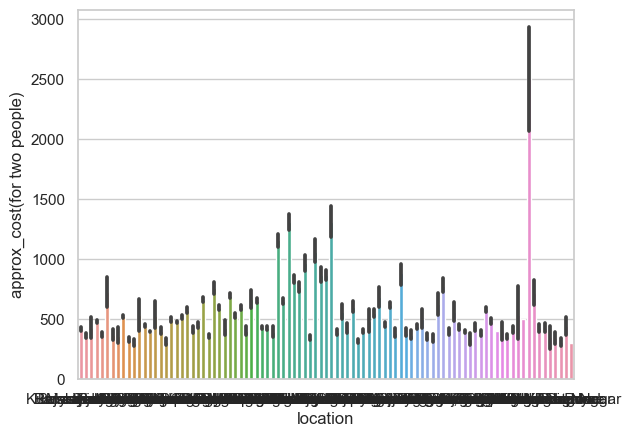

In [471]:
sns.barplot(x='location', y='approx_cost(for two people)', data=df)

> * Most people order from zomato from BTM

> * Most Rest_type available in Zomato is Quick Bites
  
> * Most List_type of restaurant available in Zomato is Delivery

### Let's Begin Preprossing our data to build our Prediction Model 

# 2. Data Preprossing

## 2.1 Data Cleaning

In [472]:
# Drop useless columns from our data for our predition
df.drop(['url','address','name','votes','phone','dish_liked','reviews_list','menu_item'], axis=1,inplace=True)

In [473]:
# Rename columns
df = df.rename(columns={'approx_cost(for two people)': 'cost_two_people'})
df = df.rename(columns={'listed_in(type)': 'listed_type'})
df = df.rename(columns={'listed_in(city)': 'listed_city'})

In [281]:
df['cuisines'] = df['cuisines'].str.replace('Tea', '')

In [251]:
# Split the strings in cuisines column and store them in a list
cuisines_substrings = []

for row in df['cuisines']:
    substrings = str(row).split(',')
    cuisines_substrings.extend(substrings)

# Remove duplicates from the list
cuisines_substrings = list(set(cuisines_substrings))

print(cuisines_substrings)

[' Continental', '', 'Desserts', ' Mangalorean', 'Salad', ' Chettinad', ' Mediterranean', ' Jewish', ' Biryani', 'Seafood', 'Beverages', ' Chinese', ' American', ' French', ' Juices', ' Oriya', ' Bar Food', 'Momos', ' Assamese', ' Middle Eastern', 'Burmese', ' Japanese', ' Hyderabadi', ' Charcoal Chicken', 'Drinks Only', ' Indian', 'South Indian', 'Arabian', ' Pizza', 'Kashmiri', 'Bengali', 'Finger Food', ' Sri Lankan', ' North Eastern', ' Andhra', ' Sindhi', ' BBQ', 'South American', 'Cafe', 'African', ' Burger', ' Wraps', ' Cafe', ' Tex-Mex', ' South Indian', 'Italian', ' Afghan', ' Hot dogs', 'German', ' Belgian', ' Lucknowi', ' Bubble ', ' Momos', ' Nepalese', ' European', 'Modern Indian', ' Seafood', 'Lucknowi', 'Continental', 'Biryani', 'Australian', 'Iranian', 'Sushi', ' Thai', 'Singaporean', ' Tibetan', ' Fast Food', 'Portuguese', 'Thai', 'Nepalese', 'Assamese', 'Coffee', ' Maharashtrian', ' Sandwich', ' Kerala', 'Malaysian', ' Malwani', ' Coffee', ' Raw Meats', ' Rolls', ' Tur

In [474]:
cuisines_substrings=['Desserts', ' Mangalorean', 'Salad', ' Chettinad', ' Mediterranean', ' Jewish', ' Biryani', 'Seafood', 'Beverages', ' Chinese', ' American', ' French', ' Juices', ' Oriya', ' Bar Food', 'Momos', ' Assamese', ' Middle Eastern', 'Burmese', ' Japanese', ' Hyderabadi', ' Charcoal Chicken', 'Drinks Only', ' Indian', 'South Indian', 'Arabian', ' Pizza', 'Kashmiri', 'Bengali', 'Finger Food', ' Sri Lankan', ' North Eastern', ' Andhra', ' Sindhi', ' BBQ', 'South American', 'Cafe', 'African', ' Burger', ' Wraps', ' Tex-Mex', ' South Indian', 'Italian', ' Afghan', ' Hot dogs', 'German', ' Belgian', ' Lucknowi', ' Bubble ', ' Momos', ' Nepalese', ' European', 'Modern Indian', ' Seafood', 'Lucknowi', 'Continental', 'Biryani', 'Australian', 'Iranian', 'Sushi', ' Thai', 'Singaporean', ' Tibetan', ' Fast Food', 'Portuguese', 'Thai', 'Nepalese', 'Assamese', 'Coffee', ' Maharashtrian', ' Sandwich', ' Kerala', 'Malaysian', ' Malwani', ' Coffee', ' Raw Meats', ' Rolls', ' Turkish', 'Turkish', 'Belgian', ' Beverages', ' Vietnamese', 'Healthy Food', 'Asian', ' Rajasthani', 'Ice Cream', 'Bihari', 'Hyderabadi', ' Singaporean', ' Awadhi', ' Burmese', 'Japanese', ' Mithai', 'Maharashtrian', ' Pan Asian', ' Roast Chicken', 'Steak', ' Modern Indian', 'Spanish', 'Mexican', ' African', 'Parsi', ' Italian', 'Sandwich', 'Indonesian', ' Afghani', 'Mithai', ' Desserts', ' Steak', ' Ice Cream', ' Kebab', ' Bihari', 'Oriya', 'Gujarati', 'Korean', ' Greek', ' Street Food', 'British', 'Bohri', ' South American', ' German', 'Mughlai', 'Street Food', 'Goan', ' Finger Food', ' Drinks Only', 'European', ' Lebanese', ' Iranian', 'Rolls', ' Mexican', 'Awadhi', ' Mongolian', 'Kerala', ' British', 'Pizza', 'Tamil', 'French', 'North Eastern', 'Middle Eastern', 'Bar Food', ' Grill', 'BBQ', ' Bakery', 'Kebab', 'American', 'Tibetan', ' Konkan', ' Arabian', ' Paan', ' Healthy Food', ' Asian', ' Malaysian', 'Burger', 'Chinese', ' Spanish', 'Lebanese', ' Naga', 'North Indian', ' Sushi', ' Mughlai', 'Mediterranean', 'Juices', ' Kashmiri', ' Parsi', 'Charcoal Chicken', 'Bakery', ' Salad', ' Goan', 'Roast Chicken', ' Korean', ' Cantonese', 'Andhra', 'Naga', ' North Indian', 'Fast Food', 'Mangalorean', 'Vietnamese', 'Rajasthani', ' Vegan', ' Gujarati', ' Indonesian', ' Bengali',  'Konkan', 'Chettinad']

In [266]:
# Split the strings in rest_type column and store them in a list
rest_type_substrings = []

for row in df['rest_type']:
    substrings = str(row).split(',')
    rest_type_substrings.extend(substrings)

# Remove duplicates from the list
rest_type_substrings = list(set(rest_type_substrings))

print(rest_type_substrings)

['Pop Up', ' Bar', ' Mess', 'Food Truck', ' Bakery', 'Dhaba', ' Pub', 'Confectionery', ' Quick Bites', 'Lounge', ' Microbrewery', ' Dessert Parlor', 'Takeaway', ' Casual Dining', ' Sweet Shop', 'Quick Bites', 'Bhojanalya', ' Food Court', 'Microbrewery', ' Meat Shop', 'Bakery', 'Delivery', 'Cafe', 'Casual Dining', 'Bar', ' Kiosk', ' Cafe', ' Irani Cafee', ' Delivery', 'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', 'Beverage Shop', ' Beverage Shop', 'Pub', 'nan', 'Sweet Shop', 'Kiosk']


In [475]:
rest_type_substrings=['Pop Up', 'Food Truck','Dhaba', 'Confectionery', 'Lounge', ' Dessert Parlor', 'Takeaway', ' Casual Dining','Quick Bites', 'Bhojanalya', 'Microbrewery', ' Meat Shop', 'Delivery', 'Casual Dining', 'Bar', ' Irani Cafee', 'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', ' Beverage Shop', 'Pub', 'Sweet Shop', 'Kiosk']

In [476]:
# Check cuisines_substrings length
len(cuisines_substrings)

185

In [477]:
# Check rest_type_substrings length
len(rest_type_substrings)

26

In [478]:
# Create columns for each cuisine from cuisines column
for cuisine in cuisines_substrings:
    df[cuisine] = df["cuisines"].str.contains(cuisine,   na=False, case=False).astype("int")

In [479]:
# Check the dataset after adding new columns
df

online_order book_table  rate                    location  \
0              Yes        Yes   4.1                Banashankari   
1              Yes         No   4.1                Banashankari   
2              Yes         No   3.8                Banashankari   
3               No         No   3.7                Banashankari   
4               No         No   3.8                Basavanagudi   
...            ...        ...   ...                         ...   
51712           No         No  3.6                   Whitefield   
51713           No         No   nan                  Whitefield   
51714           No         No   nan                  Whitefield   
51715           No        Yes  4.3   ITPL Main Road, Whitefield   
51716           No         No  3.4   ITPL Main Road, Whitefield   

                 rest_type                                cuisines  \
0            Casual Dining          North Indian, Mughlai, Chinese   
1            Casual Dining             Chinese, North Indian, Thai   
2      Cafe, Casual Dining                  Cafe, Mexican, Italian   
3              Quick Bites              South Indian, North Indian   
4            Casual Dining                North Indian, Rajasthani   
...                    ...                                     ...   
51712                  Bar                             Continental   
51713                  Bar                             Finger Food   
51714                  Bar                             Finger Food   
51715                  Bar                             Finger Food   
51716   Bar, Casual Dining  Finger Food, North Indian, Continental   

       cost_two_people    listed_type   listed_city  Desserts   Mangalorean  \
0                  800         Buffet  Banashankari         0             0   
1                  800         Buffet  Banashankari         0             0   
2                  800         Buffet  Banashankari         0             0   
3                  300         Buffet  Banashankari         0             0   
4                  600         Buffet  Banashankari         0             0   
...                ...            ...           ...       ...           ...   
51712             1500  Pubs and bars    Whitefield         0             0   
51713              600  Pubs and bars    Whitefield         0             0   
51714             2000  Pubs and bars    Whitefield         0             0   
51715             2500  Pubs and bars    Whitefield         0             0   
51716             1500  Pubs and bars    Whitefield         0             0   

       Salad   Chettinad   Mediterranean   Jewish   Biryani  Seafood  \
0          0           0               0        0         0        0   
1          0           0               0        0         0        0   
2          0           0               0        0         0        0   
3          0           0               0        0         0        0   
4          0           0               0        0         0        0   
...      ...         ...             ...      ...       ...      ...   
51712      0           0               0        0         0        0   
51713      0           0               0        0         0        0   
51714      0           0               0        0         0        0   
51715      0           0               0        0         0        0   
51716      0           0               0        0         0        0   

       Beverages   Chinese   American   French   Juices   Oriya   Bar Food  \
0              0         1          0        0        0       0          0   
1              0         0          0        0        0       0          0   
2              0         0          0        0        0       0          0   
3              0         0          0        0        0       0          0   
4              0         0          0        0        0       0          0   
...          ...       ...        ...      ...      ...     ...        ...   


In [480]:
# Create columns for each res_type from rest_type column
for res_type in rest_type_substrings:
    df[res_type] = df["rest_type"].str.contains(res_type, na=False, case=False).astype("int")

In [481]:
# Check the dataset after adding new columns
df

online_order book_table  rate                    location  \
0              Yes        Yes   4.1                Banashankari   
1              Yes         No   4.1                Banashankari   
2              Yes         No   3.8                Banashankari   
3               No         No   3.7                Banashankari   
4               No         No   3.8                Basavanagudi   
...            ...        ...   ...                         ...   
51712           No         No  3.6                   Whitefield   
51713           No         No   nan                  Whitefield   
51714           No         No   nan                  Whitefield   
51715           No        Yes  4.3   ITPL Main Road, Whitefield   
51716           No         No  3.4   ITPL Main Road, Whitefield   

                 rest_type                                cuisines  \
0            Casual Dining          North Indian, Mughlai, Chinese   
1            Casual Dining             Chinese, North Indian, Thai   
2      Cafe, Casual Dining                  Cafe, Mexican, Italian   
3              Quick Bites              South Indian, North Indian   
4            Casual Dining                North Indian, Rajasthani   
...                    ...                                     ...   
51712                  Bar                             Continental   
51713                  Bar                             Finger Food   
51714                  Bar                             Finger Food   
51715                  Bar                             Finger Food   
51716   Bar, Casual Dining  Finger Food, North Indian, Continental   

       cost_two_people    listed_type   listed_city  Desserts   Mangalorean  \
0                  800         Buffet  Banashankari         0             0   
1                  800         Buffet  Banashankari         0             0   
2                  800         Buffet  Banashankari         0             0   
3                  300         Buffet  Banashankari         0             0   
4                  600         Buffet  Banashankari         0             0   
...                ...            ...           ...       ...           ...   
51712             1500  Pubs and bars    Whitefield         0             0   
51713              600  Pubs and bars    Whitefield         0             0   
51714             2000  Pubs and bars    Whitefield         0             0   
51715             2500  Pubs and bars    Whitefield         0             0   
51716             1500  Pubs and bars    Whitefield         0             0   

       Salad   Chettinad   Mediterranean   Jewish   Biryani  Seafood  \
0          0           0               0        0         0        0   
1          0           0               0        0         0        0   
2          0           0               0        0         0        0   
3          0           0               0        0         0        0   
4          0           0               0        0         0        0   
...      ...         ...             ...      ...       ...      ...   
51712      0           0               0        0         0        0   
51713      0           0               0        0         0        0   
51714      0           0               0        0         0        0   
51715      0           0               0        0         0        0   
51716      0           0               0        0         0        0   

       Beverages   Chinese   American   French   Juices   Oriya   Bar Food  \
0              0         1          0        0        0       0          0   
1              0         0          0        0        0       0          0   
2              0         0          0        0        0       0          0   
3              0         0          0        0        0       0          0   
4              0         0          0        0        0       0          0   
...          ...       ...        ...      ...      ...     ...        ...   


In [482]:
# Drop the extracted columns from our data for our predition
df.drop(['rest_type','cuisines'], axis=1,inplace=True)

In [483]:
# Drop Nan values from rate column
df.dropna(subset=["rate"], inplace=True)

In [484]:
# Check unique values of rate column
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [485]:
# Remove nan , NEW , - Values from rate column
df.drop(index=df[df['rate'].isin(['nan', 'NEW','-'])].index, inplace=True)

In [486]:
# Check unique values of rate column
df.rate.unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [487]:
# Check shape of the left data
df.shape

(41418, 218)

> Unfortunately we lost alotof data

In [488]:
# Create new column due to 3.75 rate threshold will be successed restaurant
df["rate"] = df["rate"].astype(float)
df["Success"] = (df["rate"] >= 3.75).astype(int)

In [489]:
# Drop the rate column 
df.drop(['rate'], axis=1,inplace=True)

In [490]:
# Check the dataset after adding new columns
df

online_order book_table                    location  cost_two_people  \
0              Yes        Yes                Banashankari              800   
1              Yes         No                Banashankari              800   
2              Yes         No                Banashankari              800   
3               No         No                Banashankari              300   
4               No         No                Basavanagudi              600   
...            ...        ...                         ...              ...   
51709           No         No                  Whitefield              800   
51711           No         No                  Whitefield              800   
51712           No         No                  Whitefield             1500   
51715           No        Yes  ITPL Main Road, Whitefield             2500   
51716           No         No  ITPL Main Road, Whitefield             1500   

         listed_type   listed_city  Desserts   Mangalorean  Salad   Chettinad  \
0             Buffet  Banashankari         0             0      0           0   
1             Buffet  Banashankari         0             0      0           0   
2             Buffet  Banashankari         0             0      0           0   
3             Buffet  Banashankari         0             0      0           0   
4             Buffet  Banashankari         0             0      0           0   
...              ...           ...       ...           ...    ...         ...   
51709  Pubs and bars    Whitefield         0             0      0           0   
51711  Pubs and bars    Whitefield         0             0      0           0   
51712  Pubs and bars    Whitefield         0             0      0           0   
51715  Pubs and bars    Whitefield         0             0      0           0   
51716  Pubs and bars    Whitefield         0             0      0           0   

        Mediterranean   Jewish   Biryani  Seafood  Beverages   Chinese  \
0                   0        0         0        0          0         1   
1                   0        0         0        0          0         0   
2                   0        0         0        0          0         0   
3                   0        0         0        0          0         0   
4                   0        0         0        0          0         0   
...               ...      ...       ...      ...        ...       ...   
51709               0        0         0        0          0         0   
51711               0        0         0        0          0         1   
51712               0        0         0        0          0         0   
51715               0        0         0        0          0         0   
51716               0        0         0        0          0         0   

        American   French   Juices   Oriya   Bar Food  Momos   Assamese  \
0              0        0        0       0          0      0          0   
1              0        0        0       0          0      0          0   
2              0        0        0       0          0      0          0   
3              0        0        0       0          0      0          0   
4              0        0        0       0          0      0          0   
...          ...      ...      ...     ...        ...    ...        ...   
51709          0        0        0       0          0      0          0   
51711          0        0        0       0          0      0          0   
51712          0        0        0       0          0      0          0   
51715          0        0        0       0          0      0          0   
51716          0        0        0       0          0      0          0   

        Middle Eastern  Burmese   Japanese   Hyderabadi   Charcoal Chicken  \
0                    0        0          0            0                  0   
1                    0        0          0            0                  0   
2                    0        0          0            0                 

In [491]:
# check null values in data
df.isna().sum()/df.shape[0]

online_order       0.0
book_table         0.0
location           0.0
cost_two_people    0.0
listed_type        0.0
                  ... 
 Beverage Shop     0.0
Pub                0.0
Sweet Shop         0.0
Kiosk              0.0
Success            0.0
Length: 218, dtype: float64

### Let's build our Prediction Model 

In [492]:
# split it into x--> data,  y--> target
X = df.drop("Success", axis =1)
y = df['Success']

In [493]:
# Check if data imbalanced
y.value_counts()*100/len(y)

0    51.487276
1    48.512724
Name: Success, dtype: float64

> ### Data is balanced

In [404]:
## Models 
models = [
    ('logestic Regression', LogisticRegression()), 
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('DTC', DecisionTreeClassifier()), 
    ('RFC', RandomForestClassifier()), 
    ('ABC', AdaBoostClassifier()), 
    ('GBC', GradientBoostingClassifier()), 
    ('XGBC', XGBClassifier())
]

In [494]:
# Define columns which will be encoded
Binenc_cols=['location','listed_type','listed_city','online_order','book_table']
#Labenc_cols=['online_order','book_table']

In [147]:
# df['listed_type'].fillna('null', inplace=True)
# df['location'].fillna('null', inplace=True)
# df['listed_city'].fillna('null', inplace=True)
# df['online_order'].fillna('null', inplace=True)
# df['book_table'].fillna('null', inplace=True)

In [218]:
# Initialize RFE feature selector
RFE_selector = RFE(XGBClassifier(), n_features_to_select=140)   

# Initialize StandardScaler
scaler = StandardScaler()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[('binarycols', BinaryEncoder(), Binenc_cols)] # Encoder for Categorical columns by BinaryEncoder
            , remainder='passthrough') 

for model_name, model in models:
    # print model name
    print(f"For {model_name}:")
    # Steps Creation
    steps = list()

    steps.append(('preprocessor', preprocessor))
    steps.append(('scaler', scaler))
    steps.append(('feature_selector', RFE_selector))  # RFE feature selection
    steps.append((model_name, model))

    # Create the pipeline
    pipeline = Pipeline(steps=steps)


    ## scoring
    #Perform cross-validation
    # Example evaluation metrics
    cv_results = cross_validate(pipeline, X, y, scoring='accuracy', cv=5, return_train_score=True)  # X and y are your input data and targets

    # Access the results
    print("test :", cv_results['test_score'].mean())
    print("train:", cv_results['train_score'].mean())
    print('*' * 50)
    print('*' * 100)
    print('*' * 100)

For logestic Regression:
test : 0.733160237617926
train: 0.742243756277296
**************************************************
****************************************************************************************************
****************************************************************************************************
For Naive Bayes:
test : 0.6517460206144388
train: 0.6533814852929163
**************************************************
****************************************************************************************************
****************************************************************************************************
For KNN:
test : 0.8447540712295311
train: 0.9254913088280592
**************************************************
****************************************************************************************************
****************************************************************************************************
For DTC:
test : 0.8845927470487656
t

> ### RandomForestClassifier is best Model

In [495]:
# Define the hyperparameter grid
param_grid = {
    'RFC__n_estimators': [100],
    'RFC__max_depth': [None],
    'RFC__min_samples_split': [2],
    'RFC__min_samples_leaf': [1, 2]
}

In [406]:
# Initialize RFE feature selector
RFE_selector = RFE(XGBClassifier(), n_features_to_select=140)   

# Initialize StandardScaler
scaler = StandardScaler()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[('binarycols', BinaryEncoder(), Binenc_cols)] # Encoder for Categorical columns by BinaryEncoder
            , remainder='passthrough') 

In [496]:
steps=[]
steps.append(('preprocessor', preprocessor))
steps.append(('feature_selector', RFE_selector))
steps.append(('RFC',RandomForestClassifier()))
pipeline=Pipeline(steps=steps)

In [497]:
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'RFC__max_depth': None, 'RFC__min_samples_leaf': 1, 'RFC__min_samples_split': 2, 'RFC__n_estimators': 100}
Best Score: 0.900333993175856


In [498]:
# Get the mean test score and mean train score for the best estimator
mean_test_score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
mean_train_score = grid_search.cv_results_['mean_train_score'][grid_search.best_index_]

print("Mean Test Score:", mean_test_score)
print("Mean Train Score:", mean_train_score)

Mean Test Score: 0.900333993175856
Mean Train Score: 0.9878434536035678


In [499]:
final_Zomato_model=grid_search.best_estimator_
final_Zomato_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binarycols', BinaryEncoder(),
                                                  ['location', 'listed_type',
                                                   'listed_city',
                                                   'online_order',
                                                   'book_table'])])),
                ('feature_selector',
                 RFE(estimator=XGBClassifier(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,...
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None, ...),
                     n_features_to_select=140)),
                ('RFC', RandomForestClassifier())])

In [438]:
X.columns

Index(['online_order', 'book_table', 'location', 'cost_two_people',
       'listed_type', 'listed_city', 'Desserts', ' Mangalorean', 'Salad',
       ' Chettinad',
       ...
       'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining',
       'Mess', ' Beverage Shop', 'Pub', 'Sweet Shop', 'Kiosk'],
      dtype='object', length=217)

In [439]:
# # Get the columns of the DataFrame
# columns = X.columns

# # Append two new column names to the Index object
# new_columns = columns.append(pd.Index(['Cuisines', 'Rest_Type']))

# # Create a new DataFrame with the new columns
# new_X = X.loc[:, new_columns]


In [500]:
# Add two new columns to the DataFrame
X['Cuisines'] = ''
X['Rest_Type'] = ''

In [501]:
X.columns

Index(['online_order', 'book_table', 'location', 'cost_two_people',
       'listed_type', 'listed_city', 'Desserts', ' Mangalorean', 'Salad',
       ' Chettinad',
       ...
       'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', ' Beverage Shop',
       'Pub', 'Sweet Shop', 'Kiosk', 'Cuisines', 'Rest_Type'],
      dtype='object', length=219)

In [502]:
# Saving Model , Columns into PKL Files
jb.dump(final_Zomato_model,"PF_Zomato_Model_Final.pkl")
jb.dump(X.columns,"PF_Zomato_Inputs_Final.pkl")

['PF_Zomato_Inputs_Final.pkl']

In [412]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(df)

      online_order book_table                    location  cost_two_people  \
0              Yes        Yes                Banashankari              800   
1              Yes         No                Banashankari              800   
2              Yes         No                Banashankari              800   
3               No         No                Banashankari              300   
4               No         No                Basavanagudi              600   
...            ...        ...                         ...              ...   
51709           No         No                  Whitefield              800   
51711           No         No                  Whitefield              800   
51712           No         No                  Whitefield             1500   
51715           No        Yes  ITPL Main Road, Whitefield             2500   
51716           No         No  ITPL Main Road, Whitefield             1500   

         listed_type   listed_city  Desserts   Mangalorean  Sal

In [313]:
# Get all unique values of the column
unique_values = df['listed_city'].unique()

# Display the unique values
print('Unique values:', unique_values)

Unique values: ['Banashankari' 'Bannerghatta Road' 'Basavanagudi' 'Bellandur'
 'Brigade Road' 'Brookefield' 'BTM' 'Church Street' 'Electronic City'
 'Frazer Town' 'HSR' 'Indiranagar' 'Jayanagar' 'JP Nagar' 'Kalyan Nagar'
 'Kammanahalli' 'Koramangala 4th Block' 'Koramangala 5th Block'
 'Koramangala 6th Block' 'Koramangala 7th Block' 'Lavelle Road'
 'Malleshwaram' 'Marathahalli' 'MG Road' 'New BEL Road' 'Old Airport Road'
 'Rajajinagar' 'Residency Road' 'Sarjapur Road' 'Whitefield']


In [428]:
cuisines_substrings=['Desserts', ' Mangalorean', 'Salad', ' Chettinad', ' Mediterranean', ' Jewish', ' Biryani', 'Seafood', 'Beverages', ' Chinese', ' American', ' French', ' Juices', ' Oriya', ' Bar Food', 'Momos', ' Assamese', ' Middle Eastern', 'Burmese', ' Japanese', ' Hyderabadi', ' Charcoal Chicken', 'Drinks Only', ' Indian', 'South Indian', 'Arabian', ' Pizza', 'Kashmiri', 'Bengali', 'Finger Food', ' Sri Lankan', ' North Eastern', ' Andhra', ' Sindhi', ' BBQ', 'South American', 'Cafe', 'African', ' Burger', ' Wraps', ' Tex-Mex', ' South Indian', 'Italian', ' Afghan', ' Hot dogs', 'German', ' Belgian', ' Lucknowi', ' Bubble ', ' Momos', ' Nepalese', ' European', 'Modern Indian', ' Seafood', 'Lucknowi', 'Continental', 'Biryani', 'Australian', 'Iranian', 'Sushi', ' Thai', 'Singaporean', ' Tibetan', ' Fast Food', 'Portuguese', 'Thai', 'Nepalese', 'Assamese', 'Coffee', ' Maharashtrian', ' Sandwich', ' Kerala', 'Malaysian', ' Malwani', ' Coffee', ' Raw Meats', ' Rolls', ' Turkish', 'Turkish', 'Belgian', ' Beverages', ' Vietnamese', 'Healthy Food', 'Asian', ' Rajasthani', 'Ice Cream', 'Bihari', 'Hyderabadi', ' Singaporean', ' Awadhi', ' Burmese', 'Japanese', ' Mithai', 'Maharashtrian', ' Pan Asian', ' Roast Chicken', 'Steak', ' Modern Indian', 'Spanish', 'Mexican', ' African', 'Parsi', ' Italian', 'Sandwich', 'Indonesian', ' Afghani', 'Mithai', ' Desserts', ' Steak', ' Ice Cream', ' Kebab', ' Bihari', 'Oriya', 'Gujarati', 'Korean', ' Greek', ' Street Food', 'British', 'Bohri', ' South American', ' German', 'Mughlai', 'Street Food', 'Goan', ' Finger Food', ' Drinks Only', 'European', ' Lebanese', ' Iranian', 'Rolls', ' Mexican', 'Awadhi', ' Mongolian', 'Kerala', ' British', 'Pizza', 'Tamil', 'French', 'North Eastern', 'Middle Eastern', 'Bar Food', ' Grill', 'BBQ', ' Bakery', 'Kebab', 'American', 'Tibetan', ' Konkan', ' Arabian', ' Paan', ' Healthy Food', ' Asian', ' Malaysian', 'Burger', 'Chinese', ' Spanish', 'Lebanese', ' Naga', 'North Indian', ' Sushi', ' Mughlai', 'Mediterranean', 'Juices', ' Kashmiri', ' Parsi', 'Charcoal Chicken', 'Bakery', ' Salad', ' Goan', 'Roast Chicken', ' Korean', ' Cantonese', 'Andhra', 'Naga', ' North Indian', 'Fast Food', 'Mangalorean', 'Vietnamese', 'Rajasthani', ' Vegan', ' Gujarati', ' Indonesian', ' Bengali',  'Konkan', 'Chettinad']

for cuisine in cuisines_substrings:
    print(f'''test_df.at[0,'{cuisine}'] = test_df["Cuisines"].str.contains('{cuisine}', na=False, case=False).astype("int")''')

test_df.at[0,'Desserts'] = test_df["Cuisines"].str.contains('Desserts', na=False, case=False).astype("int")
test_df.at[0,' Mangalorean'] = test_df["Cuisines"].str.contains(' Mangalorean', na=False, case=False).astype("int")
test_df.at[0,'Salad'] = test_df["Cuisines"].str.contains('Salad', na=False, case=False).astype("int")
test_df.at[0,' Chettinad'] = test_df["Cuisines"].str.contains(' Chettinad', na=False, case=False).astype("int")
test_df.at[0,' Mediterranean'] = test_df["Cuisines"].str.contains(' Mediterranean', na=False, case=False).astype("int")
test_df.at[0,' Jewish'] = test_df["Cuisines"].str.contains(' Jewish', na=False, case=False).astype("int")
test_df.at[0,' Biryani'] = test_df["Cuisines"].str.contains(' Biryani', na=False, case=False).astype("int")
test_df.at[0,'Seafood'] = test_df["Cuisines"].str.contains('Seafood', na=False, case=False).astype("int")
test_df.at[0,'Beverages'] = test_df["Cuisines"].str.contains('Beverages', na=False, case=False).astype("int")
test_df.at[0

In [429]:
rest_type_substrings=['Pop Up', 'Food Truck','Dhaba', 'Confectionery', 'Lounge', ' Dessert Parlor', 'Takeaway', ' Casual Dining','Quick Bites', 'Bhojanalya', 'Microbrewery', ' Meat Shop', 'Delivery', 'Casual Dining', 'Bar', ' Irani Cafee', 'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', ' Beverage Shop', 'Pub', 'Sweet Shop', 'Kiosk']
for res_type in rest_type_substrings:
    print(f'''test_df.at[0,'{res_type}'] = test_df["Rest_Type"].str.contains('{res_type}', na=False, case=False).astype("int")''')

test_df.at[0,'Pop Up'] = test_df["Rest_Type"].str.contains('Pop Up', na=False, case=False).astype("int")
test_df.at[0,'Food Truck'] = test_df["Rest_Type"].str.contains('Food Truck', na=False, case=False).astype("int")
test_df.at[0,'Dhaba'] = test_df["Rest_Type"].str.contains('Dhaba', na=False, case=False).astype("int")
test_df.at[0,'Confectionery'] = test_df["Rest_Type"].str.contains('Confectionery', na=False, case=False).astype("int")
test_df.at[0,'Lounge'] = test_df["Rest_Type"].str.contains('Lounge', na=False, case=False).astype("int")
test_df.at[0,' Dessert Parlor'] = test_df["Rest_Type"].str.contains(' Dessert Parlor', na=False, case=False).astype("int")
test_df.at[0,'Takeaway'] = test_df["Rest_Type"].str.contains('Takeaway', na=False, case=False).astype("int")
test_df.at[0,' Casual Dining'] = test_df["Rest_Type"].str.contains(' Casual Dining', na=False, case=False).astype("int")
test_df.at[0,'Quick Bites'] = test_df["Rest_Type"].str.contains('Quick Bites', na=False, case=False).a

## Deployment

In [507]:
%%writefile streamlit_Zomato_final.py

import joblib
import streamlit as st
import pandas as pd
import sklearn

Model= joblib.load("PF_Zomato_Model_Final.pkl")
Inputs= joblib.load("PF_Zomato_Inputs_Final.pkl")

def prediction(online_order, book_table, location,cost_two_people, listed_type,listed_city, Cuisines, Rest_Type):
    # cuisines_substrings=['Desserts', ' Mangalorean', 'Salad', ' Chettinad', ' Mediterranean', ' Jewish', 'Tea', ' Biryani', 'Seafood', 'Beverages', ' Chinese', ' American', ' French', ' Juices', ' Oriya', ' Bar Food', 'Momos', ' Assamese', ' Middle Eastern', 'Burmese', ' Japanese', ' Hyderabadi', ' Charcoal Chicken', 'Drinks Only', ' Indian', 'South Indian', 'Arabian', ' Pizza', 'Kashmiri', 'Bengali', 'Finger Food', ' Sri Lankan', ' North Eastern', ' Andhra', ' Sindhi', ' BBQ', 'South American', 'Cafe', 'African', ' Burger', ' Wraps', ' Cafe', ' Tex-Mex', ' South Indian', 'Italian', ' Afghan', ' Hot dogs', 'German', ' Belgian', ' Bubble Tea', ' Lucknowi', ' Momos', ' Nepalese', ' European', 'Modern Indian', ' Seafood', 'Lucknowi', 'Continental', 'Biryani', 'Australian', 'Iranian', 'Sushi', ' Thai', 'Singaporean', ' Tibetan', ' Fast Food', 'Portuguese', 'Thai', 'Nepalese', 'Assamese', 'Coffee', ' Maharashtrian', ' Sandwich', ' Kerala', 'Malaysian', ' Malwani', ' Coffee', ' Raw Meats', ' Rolls', ' Turkish', 'Turkish', 'Belgian', ' Beverages', ' Vietnamese', 'Healthy Food', 'Asian', ' Rajasthani', 'Ice Cream', 'Bihari', 'Hyderabadi', ' Singaporean', ' Awadhi', ' Burmese', 'Japanese', ' Mithai', 'Maharashtrian', ' Pan Asian', ' Roast Chicken', 'Steak', ' Modern Indian', 'Spanish', 'Mexican', ' African', 'Parsi', ' Italian', 'Sandwich', 'Indonesian', ' Afghani', 'Mithai', ' Desserts', ' Steak', ' Ice Cream', ' Kebab', ' Bihari', 'Oriya', 'Gujarati', 'Korean', ' Greek', ' Street Food', 'British', 'Bohri', ' South American', ' German', 'Mughlai', 'Street Food', 'Goan', ' Finger Food', ' Drinks Only', 'European', ' Lebanese', ' Iranian', 'Rolls', ' Mexican', 'Awadhi', ' Mongolian', 'Kerala', ' British', 'Pizza', 'Tamil', 'French', 'North Eastern', 'Middle Eastern', 'Bar Food', ' Grill', 'BBQ', ' Bakery', 'Kebab', 'American', 'Tibetan', ' Konkan', ' Arabian', ' Paan', ' Healthy Food', ' Asian', ' Malaysian', 'Burger', 'Chinese', ' Spanish', 'Lebanese', ' Naga', 'North Indian', ' Sushi', ' Mughlai', 'Mediterranean', 'Juices', ' Kashmiri', ' Parsi', 'Charcoal Chicken', 'Bakery', ' Salad', ' Goan', 'Roast Chicken', ' Korean', ' Cantonese', 'Andhra', 'Naga', ' North Indian', 'Fast Food', 'Mangalorean', 'Vietnamese', 'Rajasthani', ' Vegan', ' Gujarati', ' Indonesian', ' Tea', ' Bengali', 'Konkan', 'Chettinad']
    # rest_type_substrings=['Pop Up', ' Bar', ' Mess', 'Food Truck', ' Bakery', 'Dhaba', ' Pub', 'Confectionery', ' Quick Bites', 'Lounge', ' Microbrewery', ' Dessert Parlor', 'Takeaway', ' Casual Dining', ' Sweet Shop', 'Quick Bites', 'Bhojanalya', ' Food Court', 'Microbrewery', ' Meat Shop', 'Bakery', 'Delivery', 'Cafe', 'Casual Dining', 'Bar', ' Kiosk', ' Cafe', ' Irani Cafee', ' Delivery', 'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', ' Beverage Shop', 'Pub', 'Sweet Shop', 'Kiosk']
    test_df=pd.DataFrame(columns=Inputs)
    test_df.at[0,'online_order']= online_order
    test_df.at[0,'book_table']= book_table
    test_df.at[0,'location']= location
    test_df.at[0,'cost_two_people']= cost_two_people
    test_df.at[0,'listed_type']=  listed_type
    test_df.at[0,'listed_city']=  listed_city
    test_df.at[0,'Cuisines']= Cuisines
    test_df.at[0,'Rest_Type']= Rest_Type
    test_df.at[0,'Desserts'] = test_df["Cuisines"].str.contains('Desserts', na=False, case=False).astype("int")
    test_df.at[0,' Mangalorean'] = test_df["Cuisines"].str.contains(' Mangalorean', na=False, case=False).astype("int")
    test_df.at[0,'Salad'] = test_df["Cuisines"].str.contains('Salad', na=False, case=False).astype("int")
    test_df.at[0,' Chettinad'] = test_df["Cuisines"].str.contains(' Chettinad', na=False, case=False).astype("int")
    test_df.at[0,' Mediterranean'] = test_df["Cuisines"].str.contains(' Mediterranean', na=False, case=False).astype("int")
    test_df.at[0,' Jewish'] = test_df["Cuisines"].str.contains(' Jewish', na=False, case=False).astype("int")
    test_df.at[0,' Biryani'] = test_df["Cuisines"].str.contains(' Biryani', na=False, case=False).astype("int")
    test_df.at[0,'Seafood'] = test_df["Cuisines"].str.contains('Seafood', na=False, case=False).astype("int")
    test_df.at[0,'Beverages'] = test_df["Cuisines"].str.contains('Beverages', na=False, case=False).astype("int")
    test_df.at[0,' Chinese'] = test_df["Cuisines"].str.contains(' Chinese', na=False, case=False).astype("int")
    test_df.at[0,' American'] = test_df["Cuisines"].str.contains(' American', na=False, case=False).astype("int")
    test_df.at[0,' French'] = test_df["Cuisines"].str.contains(' French', na=False, case=False).astype("int")
    test_df.at[0,' Juices'] = test_df["Cuisines"].str.contains(' Juices', na=False, case=False).astype("int")
    test_df.at[0,' Oriya'] = test_df["Cuisines"].str.contains(' Oriya', na=False, case=False).astype("int")
    test_df.at[0,' Bar Food'] = test_df["Cuisines"].str.contains(' Bar Food', na=False, case=False).astype("int")
    test_df.at[0,'Momos'] = test_df["Cuisines"].str.contains('Momos', na=False, case=False).astype("int")
    test_df.at[0,' Assamese'] = test_df["Cuisines"].str.contains(' Assamese', na=False, case=False).astype("int")
    test_df.at[0,' Middle Eastern'] = test_df["Cuisines"].str.contains(' Middle Eastern', na=False, case=False).astype("int")
    test_df.at[0,'Burmese'] = test_df["Cuisines"].str.contains('Burmese', na=False, case=False).astype("int")
    test_df.at[0,' Japanese'] = test_df["Cuisines"].str.contains(' Japanese', na=False, case=False).astype("int")
    test_df.at[0,' Hyderabadi'] = test_df["Cuisines"].str.contains(' Hyderabadi', na=False, case=False).astype("int")
    test_df.at[0,' Charcoal Chicken'] = test_df["Cuisines"].str.contains(' Charcoal Chicken', na=False, case=False).astype("int")
    test_df.at[0,'Drinks Only'] = test_df["Cuisines"].str.contains('Drinks Only', na=False, case=False).astype("int")
    test_df.at[0,' Indian'] = test_df["Cuisines"].str.contains(' Indian', na=False, case=False).astype("int")
    test_df.at[0,'South Indian'] = test_df["Cuisines"].str.contains('South Indian', na=False, case=False).astype("int")
    test_df.at[0,'Arabian'] = test_df["Cuisines"].str.contains('Arabian', na=False, case=False).astype("int")
    test_df.at[0,' Pizza'] = test_df["Cuisines"].str.contains(' Pizza', na=False, case=False).astype("int")
    test_df.at[0,'Kashmiri'] = test_df["Cuisines"].str.contains('Kashmiri', na=False, case=False).astype("int")
    test_df.at[0,'Bengali'] = test_df["Cuisines"].str.contains('Bengali', na=False, case=False).astype("int")
    test_df.at[0,'Finger Food'] = test_df["Cuisines"].str.contains('Finger Food', na=False, case=False).astype("int")
    test_df.at[0,' Sri Lankan'] = test_df["Cuisines"].str.contains(' Sri Lankan', na=False, case=False).astype("int")
    test_df.at[0,' North Eastern'] = test_df["Cuisines"].str.contains(' North Eastern', na=False, case=False).astype("int")
    test_df.at[0,' Andhra'] = test_df["Cuisines"].str.contains(' Andhra', na=False, case=False).astype("int")
    test_df.at[0,' Sindhi'] = test_df["Cuisines"].str.contains(' Sindhi', na=False, case=False).astype("int")
    test_df.at[0,' BBQ'] = test_df["Cuisines"].str.contains(' BBQ', na=False, case=False).astype("int")
    test_df.at[0,'South American'] = test_df["Cuisines"].str.contains('South American', na=False, case=False).astype("int")
    test_df.at[0,'Cafe'] = test_df["Cuisines"].str.contains('Cafe', na=False, case=False).astype("int")
    test_df.at[0,'African'] = test_df["Cuisines"].str.contains('African', na=False, case=False).astype("int")
    test_df.at[0,' Burger'] = test_df["Cuisines"].str.contains(' Burger', na=False, case=False).astype("int")
    test_df.at[0,' Wraps'] = test_df["Cuisines"].str.contains(' Wraps', na=False, case=False).astype("int")
    test_df.at[0,' Tex-Mex'] = test_df["Cuisines"].str.contains(' Tex-Mex', na=False, case=False).astype("int")
    test_df.at[0,' South Indian'] = test_df["Cuisines"].str.contains(' South Indian', na=False, case=False).astype("int")
    test_df.at[0,'Italian'] = test_df["Cuisines"].str.contains('Italian', na=False, case=False).astype("int")
    test_df.at[0,' Afghan'] = test_df["Cuisines"].str.contains(' Afghan', na=False, case=False).astype("int")
    test_df.at[0,' Hot dogs'] = test_df["Cuisines"].str.contains(' Hot dogs', na=False, case=False).astype("int")
    test_df.at[0,'German'] = test_df["Cuisines"].str.contains('German', na=False, case=False).astype("int")
    test_df.at[0,' Belgian'] = test_df["Cuisines"].str.contains(' Belgian', na=False, case=False).astype("int")
    test_df.at[0,' Lucknowi'] = test_df["Cuisines"].str.contains(' Lucknowi', na=False, case=False).astype("int")
    test_df.at[0,' Bubble '] = test_df["Cuisines"].str.contains(' Bubble ', na=False, case=False).astype("int")
    test_df.at[0,' Momos'] = test_df["Cuisines"].str.contains(' Momos', na=False, case=False).astype("int")
    test_df.at[0,' Nepalese'] = test_df["Cuisines"].str.contains(' Nepalese', na=False, case=False).astype("int")
    test_df.at[0,' European'] = test_df["Cuisines"].str.contains(' European', na=False, case=False).astype("int")
    test_df.at[0,'Modern Indian'] = test_df["Cuisines"].str.contains('Modern Indian', na=False, case=False).astype("int")
    test_df.at[0,' Seafood'] = test_df["Cuisines"].str.contains(' Seafood', na=False, case=False).astype("int")
    test_df.at[0,'Lucknowi'] = test_df["Cuisines"].str.contains('Lucknowi', na=False, case=False).astype("int")
    test_df.at[0,'Continental'] = test_df["Cuisines"].str.contains('Continental', na=False, case=False).astype("int")
    test_df.at[0,'Biryani'] = test_df["Cuisines"].str.contains('Biryani', na=False, case=False).astype("int")
    test_df.at[0,'Australian'] = test_df["Cuisines"].str.contains('Australian', na=False, case=False).astype("int")
    test_df.at[0,'Iranian'] = test_df["Cuisines"].str.contains('Iranian', na=False, case=False).astype("int")
    test_df.at[0,'Sushi'] = test_df["Cuisines"].str.contains('Sushi', na=False, case=False).astype("int")
    test_df.at[0,' Thai'] = test_df["Cuisines"].str.contains(' Thai', na=False, case=False).astype("int")
    test_df.at[0,'Singaporean'] = test_df["Cuisines"].str.contains('Singaporean', na=False, case=False).astype("int")
    test_df.at[0,' Tibetan'] = test_df["Cuisines"].str.contains(' Tibetan', na=False, case=False).astype("int")
    test_df.at[0,' Fast Food'] = test_df["Cuisines"].str.contains(' Fast Food', na=False, case=False).astype("int")
    test_df.at[0,'Portuguese'] = test_df["Cuisines"].str.contains('Portuguese', na=False, case=False).astype("int")
    test_df.at[0,'Thai'] = test_df["Cuisines"].str.contains('Thai', na=False, case=False).astype("int")
    test_df.at[0,'Nepalese'] = test_df["Cuisines"].str.contains('Nepalese', na=False, case=False).astype("int")
    test_df.at[0,'Assamese'] = test_df["Cuisines"].str.contains('Assamese', na=False, case=False).astype("int")
    test_df.at[0,'Coffee'] = test_df["Cuisines"].str.contains('Coffee', na=False, case=False).astype("int")
    test_df.at[0,' Maharashtrian'] = test_df["Cuisines"].str.contains(' Maharashtrian', na=False, case=False).astype("int")
    test_df.at[0,' Sandwich'] = test_df["Cuisines"].str.contains(' Sandwich', na=False, case=False).astype("int")
    test_df.at[0,' Kerala'] = test_df["Cuisines"].str.contains(' Kerala', na=False, case=False).astype("int")
    test_df.at[0,'Malaysian'] = test_df["Cuisines"].str.contains('Malaysian', na=False, case=False).astype("int")
    test_df.at[0,' Malwani'] = test_df["Cuisines"].str.contains(' Malwani', na=False, case=False).astype("int")
    test_df.at[0,' Coffee'] = test_df["Cuisines"].str.contains(' Coffee', na=False, case=False).astype("int")
    test_df.at[0,' Raw Meats'] = test_df["Cuisines"].str.contains(' Raw Meats', na=False, case=False).astype("int")
    test_df.at[0,' Rolls'] = test_df["Cuisines"].str.contains(' Rolls', na=False, case=False).astype("int")
    test_df.at[0,' Turkish'] = test_df["Cuisines"].str.contains(' Turkish', na=False, case=False).astype("int")
    test_df.at[0,'Turkish'] = test_df["Cuisines"].str.contains('Turkish', na=False, case=False).astype("int")
    test_df.at[0,'Belgian'] = test_df["Cuisines"].str.contains('Belgian', na=False, case=False).astype("int")
    test_df.at[0,' Beverages'] = test_df["Cuisines"].str.contains(' Beverages', na=False, case=False).astype("int")
    test_df.at[0,' Vietnamese'] = test_df["Cuisines"].str.contains(' Vietnamese', na=False, case=False).astype("int")
    test_df.at[0,'Healthy Food'] = test_df["Cuisines"].str.contains('Healthy Food', na=False, case=False).astype("int")
    test_df.at[0,'Asian'] = test_df["Cuisines"].str.contains('Asian', na=False, case=False).astype("int")
    test_df.at[0,' Rajasthani'] = test_df["Cuisines"].str.contains(' Rajasthani', na=False, case=False).astype("int")
    test_df.at[0,'Ice Cream'] = test_df["Cuisines"].str.contains('Ice Cream', na=False, case=False).astype("int")
    test_df.at[0,'Bihari'] = test_df["Cuisines"].str.contains('Bihari', na=False, case=False).astype("int")
    test_df.at[0,'Hyderabadi'] = test_df["Cuisines"].str.contains('Hyderabadi', na=False, case=False).astype("int")
    test_df.at[0,' Singaporean'] = test_df["Cuisines"].str.contains(' Singaporean', na=False, case=False).astype("int")
    test_df.at[0,' Awadhi'] = test_df["Cuisines"].str.contains(' Awadhi', na=False, case=False).astype("int")
    test_df.at[0,' Burmese'] = test_df["Cuisines"].str.contains(' Burmese', na=False, case=False).astype("int")
    test_df.at[0,'Japanese'] = test_df["Cuisines"].str.contains('Japanese', na=False, case=False).astype("int")
    test_df.at[0,' Mithai'] = test_df["Cuisines"].str.contains(' Mithai', na=False, case=False).astype("int")
    test_df.at[0,'Maharashtrian'] = test_df["Cuisines"].str.contains('Maharashtrian', na=False, case=False).astype("int")
    test_df.at[0,' Pan Asian'] = test_df["Cuisines"].str.contains(' Pan Asian', na=False, case=False).astype("int")
    test_df.at[0,' Roast Chicken'] = test_df["Cuisines"].str.contains(' Roast Chicken', na=False, case=False).astype("int")
    test_df.at[0,'Steak'] = test_df["Cuisines"].str.contains('Steak', na=False, case=False).astype("int")
    test_df.at[0,' Modern Indian'] = test_df["Cuisines"].str.contains(' Modern Indian', na=False, case=False).astype("int")
    test_df.at[0,'Spanish'] = test_df["Cuisines"].str.contains('Spanish', na=False, case=False).astype("int")
    test_df.at[0,'Mexican'] = test_df["Cuisines"].str.contains('Mexican', na=False, case=False).astype("int")
    test_df.at[0,' African'] = test_df["Cuisines"].str.contains(' African', na=False, case=False).astype("int")
    test_df.at[0,'Parsi'] = test_df["Cuisines"].str.contains('Parsi', na=False, case=False).astype("int")
    test_df.at[0,' Italian'] = test_df["Cuisines"].str.contains(' Italian', na=False, case=False).astype("int")
    test_df.at[0,'Sandwich'] = test_df["Cuisines"].str.contains('Sandwich', na=False, case=False).astype("int")
    test_df.at[0,'Indonesian'] = test_df["Cuisines"].str.contains('Indonesian', na=False, case=False).astype("int")
    test_df.at[0,' Afghani'] = test_df["Cuisines"].str.contains(' Afghani', na=False, case=False).astype("int")
    test_df.at[0,'Mithai'] = test_df["Cuisines"].str.contains('Mithai', na=False, case=False).astype("int")
    test_df.at[0,' Desserts'] = test_df["Cuisines"].str.contains(' Desserts', na=False, case=False).astype("int")
    test_df.at[0,' Steak'] = test_df["Cuisines"].str.contains(' Steak', na=False, case=False).astype("int")
    test_df.at[0,' Ice Cream'] = test_df["Cuisines"].str.contains(' Ice Cream', na=False, case=False).astype("int")
    test_df.at[0,' Kebab'] = test_df["Cuisines"].str.contains(' Kebab', na=False, case=False).astype("int")
    test_df.at[0,' Bihari'] = test_df["Cuisines"].str.contains(' Bihari', na=False, case=False).astype("int")
    test_df.at[0,'Oriya'] = test_df["Cuisines"].str.contains('Oriya', na=False, case=False).astype("int")
    test_df.at[0,'Gujarati'] = test_df["Cuisines"].str.contains('Gujarati', na=False, case=False).astype("int")
    test_df.at[0,'Korean'] = test_df["Cuisines"].str.contains('Korean', na=False, case=False).astype("int")
    test_df.at[0,' Greek'] = test_df["Cuisines"].str.contains(' Greek', na=False, case=False).astype("int")
    test_df.at[0,' Street Food'] = test_df["Cuisines"].str.contains(' Street Food', na=False, case=False).astype("int")
    test_df.at[0,'British'] = test_df["Cuisines"].str.contains('British', na=False, case=False).astype("int")
    test_df.at[0,'Bohri'] = test_df["Cuisines"].str.contains('Bohri', na=False, case=False).astype("int")
    test_df.at[0,' South American'] = test_df["Cuisines"].str.contains(' South American', na=False, case=False).astype("int")
    test_df.at[0,' German'] = test_df["Cuisines"].str.contains(' German', na=False, case=False).astype("int")
    test_df.at[0,'Mughlai'] = test_df["Cuisines"].str.contains('Mughlai', na=False, case=False).astype("int")
    test_df.at[0,'Street Food'] = test_df["Cuisines"].str.contains('Street Food', na=False, case=False).astype("int")
    test_df.at[0,'Goan'] = test_df["Cuisines"].str.contains('Goan', na=False, case=False).astype("int")
    test_df.at[0,' Finger Food'] = test_df["Cuisines"].str.contains(' Finger Food', na=False, case=False).astype("int")
    test_df.at[0,' Drinks Only'] = test_df["Cuisines"].str.contains(' Drinks Only', na=False, case=False).astype("int")
    test_df.at[0,'European'] = test_df["Cuisines"].str.contains('European', na=False, case=False).astype("int")
    test_df.at[0,' Lebanese'] = test_df["Cuisines"].str.contains(' Lebanese', na=False, case=False).astype("int")
    test_df.at[0,' Iranian'] = test_df["Cuisines"].str.contains(' Iranian', na=False, case=False).astype("int")
    test_df.at[0,'Rolls'] = test_df["Cuisines"].str.contains('Rolls', na=False, case=False).astype("int")
    test_df.at[0,' Mexican'] = test_df["Cuisines"].str.contains(' Mexican', na=False, case=False).astype("int")
    test_df.at[0,'Awadhi'] = test_df["Cuisines"].str.contains('Awadhi', na=False, case=False).astype("int")
    test_df.at[0,' Mongolian'] = test_df["Cuisines"].str.contains(' Mongolian', na=False, case=False).astype("int")
    test_df.at[0,'Kerala'] = test_df["Cuisines"].str.contains('Kerala', na=False, case=False).astype("int")
    test_df.at[0,' British'] = test_df["Cuisines"].str.contains(' British', na=False, case=False).astype("int")
    test_df.at[0,'Pizza'] = test_df["Cuisines"].str.contains('Pizza', na=False, case=False).astype("int")
    test_df.at[0,'Tamil'] = test_df["Cuisines"].str.contains('Tamil', na=False, case=False).astype("int")
    test_df.at[0,'French'] = test_df["Cuisines"].str.contains('French', na=False, case=False).astype("int")
    test_df.at[0,'North Eastern'] = test_df["Cuisines"].str.contains('North Eastern', na=False, case=False).astype("int")
    test_df.at[0,'Middle Eastern'] = test_df["Cuisines"].str.contains('Middle Eastern', na=False, case=False).astype("int")
    test_df.at[0,'Bar Food'] = test_df["Cuisines"].str.contains('Bar Food', na=False, case=False).astype("int")
    test_df.at[0,' Grill'] = test_df["Cuisines"].str.contains(' Grill', na=False, case=False).astype("int")
    test_df.at[0,'BBQ'] = test_df["Cuisines"].str.contains('BBQ', na=False, case=False).astype("int")
    test_df.at[0,' Bakery'] = test_df["Cuisines"].str.contains(' Bakery', na=False, case=False).astype("int")
    test_df.at[0,'Kebab'] = test_df["Cuisines"].str.contains('Kebab', na=False, case=False).astype("int")
    test_df.at[0,'American'] = test_df["Cuisines"].str.contains('American', na=False, case=False).astype("int")
    test_df.at[0,'Tibetan'] = test_df["Cuisines"].str.contains('Tibetan', na=False, case=False).astype("int")
    test_df.at[0,' Konkan'] = test_df["Cuisines"].str.contains(' Konkan', na=False, case=False).astype("int")
    test_df.at[0,' Arabian'] = test_df["Cuisines"].str.contains(' Arabian', na=False, case=False).astype("int")
    test_df.at[0,' Paan'] = test_df["Cuisines"].str.contains(' Paan', na=False, case=False).astype("int")
    test_df.at[0,' Healthy Food'] = test_df["Cuisines"].str.contains(' Healthy Food', na=False, case=False).astype("int")
    test_df.at[0,' Asian'] = test_df["Cuisines"].str.contains(' Asian', na=False, case=False).astype("int")
    test_df.at[0,' Malaysian'] = test_df["Cuisines"].str.contains(' Malaysian', na=False, case=False).astype("int")
    test_df.at[0,'Burger'] = test_df["Cuisines"].str.contains('Burger', na=False, case=False).astype("int")
    test_df.at[0,'Chinese'] = test_df["Cuisines"].str.contains('Chinese', na=False, case=False).astype("int")
    test_df.at[0,' Spanish'] = test_df["Cuisines"].str.contains(' Spanish', na=False, case=False).astype("int")
    test_df.at[0,'Lebanese'] = test_df["Cuisines"].str.contains('Lebanese', na=False, case=False).astype("int")
    test_df.at[0,' Naga'] = test_df["Cuisines"].str.contains(' Naga', na=False, case=False).astype("int")
    test_df.at[0,'North Indian'] = test_df["Cuisines"].str.contains('North Indian', na=False, case=False).astype("int")
    test_df.at[0,' Sushi'] = test_df["Cuisines"].str.contains(' Sushi', na=False, case=False).astype("int")
    test_df.at[0,' Mughlai'] = test_df["Cuisines"].str.contains(' Mughlai', na=False, case=False).astype("int")
    test_df.at[0,'Mediterranean'] = test_df["Cuisines"].str.contains('Mediterranean', na=False, case=False).astype("int")
    test_df.at[0,'Juices'] = test_df["Cuisines"].str.contains('Juices', na=False, case=False).astype("int")
    test_df.at[0,' Kashmiri'] = test_df["Cuisines"].str.contains(' Kashmiri', na=False, case=False).astype("int")
    test_df.at[0,' Parsi'] = test_df["Cuisines"].str.contains(' Parsi', na=False, case=False).astype("int")
    test_df.at[0,'Charcoal Chicken'] = test_df["Cuisines"].str.contains('Charcoal Chicken', na=False, case=False).astype("int")
    test_df.at[0,'Bakery'] = test_df["Cuisines"].str.contains('Bakery', na=False, case=False).astype("int")
    test_df.at[0,' Salad'] = test_df["Cuisines"].str.contains(' Salad', na=False, case=False).astype("int")
    test_df.at[0,' Goan'] = test_df["Cuisines"].str.contains(' Goan', na=False, case=False).astype("int")
    test_df.at[0,'Roast Chicken'] = test_df["Cuisines"].str.contains('Roast Chicken', na=False, case=False).astype("int")
    test_df.at[0,' Korean'] = test_df["Cuisines"].str.contains(' Korean', na=False, case=False).astype("int")
    test_df.at[0,' Cantonese'] = test_df["Cuisines"].str.contains(' Cantonese', na=False, case=False).astype("int")
    test_df.at[0,'Andhra'] = test_df["Cuisines"].str.contains('Andhra', na=False, case=False).astype("int")
    test_df.at[0,'Naga'] = test_df["Cuisines"].str.contains('Naga', na=False, case=False).astype("int")
    test_df.at[0,' North Indian'] = test_df["Cuisines"].str.contains(' North Indian', na=False, case=False).astype("int")
    test_df.at[0,'Fast Food'] = test_df["Cuisines"].str.contains('Fast Food', na=False, case=False).astype("int")
    test_df.at[0,'Mangalorean'] = test_df["Cuisines"].str.contains('Mangalorean', na=False, case=False).astype("int")
    test_df.at[0,'Vietnamese'] = test_df["Cuisines"].str.contains('Vietnamese', na=False, case=False).astype("int")
    test_df.at[0,'Rajasthani'] = test_df["Cuisines"].str.contains('Rajasthani', na=False, case=False).astype("int")
    test_df.at[0,' Vegan'] = test_df["Cuisines"].str.contains(' Vegan', na=False, case=False).astype("int")
    test_df.at[0,' Gujarati'] = test_df["Cuisines"].str.contains(' Gujarati', na=False, case=False).astype("int")
    test_df.at[0,' Indonesian'] = test_df["Cuisines"].str.contains(' Indonesian', na=False, case=False).astype("int")
    test_df.at[0,' Bengali'] = test_df["Cuisines"].str.contains(' Bengali', na=False, case=False).astype("int")
    test_df.at[0,'Konkan'] = test_df["Cuisines"].str.contains('Konkan', na=False, case=False).astype("int")
    test_df.at[0,'Chettinad'] = test_df["Cuisines"].str.contains('Chettinad', na=False, case=False).astype("int")
    test_df.at[0,'Pop Up'] = test_df["Rest_Type"].str.contains('Pop Up', na=False, case=False).astype("int")
    test_df.at[0,'Food Truck'] = test_df["Rest_Type"].str.contains('Food Truck', na=False, case=False).astype("int")
    test_df.at[0,'Dhaba'] = test_df["Rest_Type"].str.contains('Dhaba', na=False, case=False).astype("int")
    test_df.at[0,'Confectionery'] = test_df["Rest_Type"].str.contains('Confectionery', na=False, case=False).astype("int")
    test_df.at[0,'Lounge'] = test_df["Rest_Type"].str.contains('Lounge', na=False, case=False).astype("int")
    test_df.at[0,' Dessert Parlor'] = test_df["Rest_Type"].str.contains(' Dessert Parlor', na=False, case=False).astype("int")
    test_df.at[0,'Takeaway'] = test_df["Rest_Type"].str.contains('Takeaway', na=False, case=False).astype("int")
    test_df.at[0,' Casual Dining'] = test_df["Rest_Type"].str.contains(' Casual Dining', na=False, case=False).astype("int")
    test_df.at[0,'Quick Bites'] = test_df["Rest_Type"].str.contains('Quick Bites', na=False, case=False).astype("int")
    test_df.at[0,'Bhojanalya'] = test_df["Rest_Type"].str.contains('Bhojanalya', na=False, case=False).astype("int")
    test_df.at[0,'Microbrewery'] = test_df["Rest_Type"].str.contains('Microbrewery', na=False, case=False).astype("int")
    test_df.at[0,' Meat Shop'] = test_df["Rest_Type"].str.contains(' Meat Shop', na=False, case=False).astype("int")
    test_df.at[0,'Delivery'] = test_df["Rest_Type"].str.contains('Delivery', na=False, case=False).astype("int")
    test_df.at[0,'Casual Dining'] = test_df["Rest_Type"].str.contains('Casual Dining', na=False, case=False).astype("int")
    test_df.at[0,'Bar'] = test_df["Rest_Type"].str.contains('Bar', na=False, case=False).astype("int")
    test_df.at[0,' Irani Cafee'] = test_df["Rest_Type"].str.contains(' Irani Cafee', na=False, case=False).astype("int")
    test_df.at[0,'Food Court'] = test_df["Rest_Type"].str.contains('Food Court', na=False, case=False).astype("int")
    test_df.at[0,' Lounge'] = test_df["Rest_Type"].str.contains(' Lounge', na=False, case=False).astype("int")
    test_df.at[0,'Dessert Parlor'] = test_df["Rest_Type"].str.contains('Dessert Parlor', na=False, case=False).astype("int")
    test_df.at[0,'Club'] = test_df["Rest_Type"].str.contains('Club', na=False, case=False).astype("int")
    test_df.at[0,'Fine Dining'] = test_df["Rest_Type"].str.contains('Fine Dining', na=False, case=False).astype("int")
    test_df.at[0,'Mess'] = test_df["Rest_Type"].str.contains('Mess', na=False, case=False).astype("int")
    test_df.at[0,' Beverage Shop'] = test_df["Rest_Type"].str.contains(' Beverage Shop', na=False, case=False).astype("int")
    test_df.at[0,'Pub'] = test_df["Rest_Type"].str.contains('Pub', na=False, case=False).astype("int")
    test_df.at[0,'Sweet Shop'] = test_df["Rest_Type"].str.contains('Sweet Shop', na=False, case=False).astype("int")
    test_df.at[0,'Kiosk'] = test_df["Rest_Type"].str.contains('Kiosk', na=False, case=False).astype("int")
#     for cuisine in cuisines_substrings:
#         test_df.at[0,cuisine] = test_df["Cuisines"].str.contains(cuisine, na=False, case=False).astype("int")
#     for res_type in rest_type_substrings:
#         test_df.at[0,res_type] = test_df["Rest_Type"].str.contains(res_type, na=False, case=False).astype("int")
    
    test_df.drop('Cuisines',axis=1,inplace=True)
    test_df.drop('Rest_Type',axis=1,inplace=True)
    result= Model.predict(test_df)
    return result[0]

def main():
    
    ## Setting up the page title
    st.set_page_config(page_title= 'Zomato Restraunts Success Prediction')
    
     # Add a title in the middle of the page using Markdown and CSS
    st.markdown("<h1 style='text-align: center;text-decoration: underline;color:GoldenRod'>Zomato Restraunts Success Prediction</h1>", unsafe_allow_html=True)
          
    online_order=st.radio('Does Restraunt have online orders?', ['Yes', 'No'])

    book_table=st.radio('Does Restraunt have booking tables?', ['Yes', 'No'])

    
    location=st.selectbox('Where is the Restraunt?', ['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Marathahalli', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'Domlur', 'Koramangala 8th Block', 'Ejipura',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Seshadripuram',
       'Kammanahalli', 'Koramangala 6th Block', 'Majestic',
       'Langford Town', 'Central Bangalore', 'Brookefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whitefield',
       'Koramangala 2nd Block', 'Koramangala 3rd Block',
       'Koramangala 4th Block', 'Koramangala', 'Hosur Road', 'RT Nagar',
       'Banaswadi', 'North Bangalore', 'Nagawara', 'Hennur',
       'Kalyan Nagar', 'HBR Layout', 'Rammurthy Nagar', 'Thippasandra',
       'CV Raman Nagar', 'Kaggadasapura', 'Kengeri', 'Sankey Road',
       'Malleshwaram', 'Sanjay Nagar', 'Sadashiv Nagar',
       'Basaveshwara Nagar', 'Rajajinagar', 'Yeshwantpur', 'New BEL Road',
       'West Bangalore', 'Magadi Road', 'Yelahanka', 'Sahakara Nagar',
       'Jalahalli', 'Hebbal', 'Nagarbhavi', 'Peenya', 'KR Puram'])
        
    cost_two_people=st.number_input('What is the average cost for two people',min_value=10, max_value=10000, value=800,step=10)

    listed_type =st.selectbox('What is Restraunt List Type?', ['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out','Drinks & nightlife', 'Pubs and bars'])

    listed_city =st.selectbox('Which city is the restraunt in?', ['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur'
         ,'Brigade Road', 'Brookefield', 'BTM', 'Church Street', 'Electronic City'
         ,'Frazer Town', 'HSR', 'Indiranagar', 'Jayanagar', 'JP Nagar', 'Kalyan Nagar'
         ,'Kammanahalli', 'Koramangala 4th Block', 'Koramangala 5th Block'
         ,'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road'
         ,'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road', 'Old Airport Road'
         ,'Rajajinagar', 'Residency Road', 'Sarjapur Road', 'Whitefield'])

    Cuisines = st.multiselect('Select Restraunt Cuisines:',['Desserts', ' Mangalorean', 'Salad', ' Chettinad', ' Mediterranean', ' Jewish', ' Biryani', 'Seafood', 'Beverages', ' Chinese', ' American', ' French', ' Juices', ' Oriya', ' Bar Food', 'Momos', ' Assamese', ' Middle Eastern', 'Burmese', ' Japanese', ' Hyderabadi', ' Charcoal Chicken', 'Drinks Only', ' Indian', 'South Indian', 'Arabian', ' Pizza', 'Kashmiri', 'Bengali', 'Finger Food', ' Sri Lankan', ' North Eastern', ' Andhra', ' Sindhi', ' BBQ', 'South American', 'Cafe', 'African', ' Burger', ' Wraps', ' Tex-Mex', ' South Indian', 'Italian', ' Afghan', ' Hot dogs', 'German', ' Belgian', ' Lucknowi', ' Bubble ', ' Momos', ' Nepalese', ' European', 'Modern Indian', ' Seafood', 'Lucknowi', 'Continental', 'Biryani', 'Australian', 'Iranian', 'Sushi', ' Thai', 'Singaporean', ' Tibetan', ' Fast Food', 'Portuguese', 'Thai', 'Nepalese', 'Assamese', 'Coffee', ' Maharashtrian', ' Sandwich', ' Kerala', 'Malaysian', ' Malwani', ' Coffee', ' Raw Meats', ' Rolls', ' Turkish', 'Turkish', 'Belgian', ' Beverages', ' Vietnamese', 'Healthy Food', 'Asian', ' Rajasthani', 'Ice Cream', 'Bihari', 'Hyderabadi', ' Singaporean', ' Awadhi', ' Burmese', 'Japanese', ' Mithai', 'Maharashtrian', ' Pan Asian', ' Roast Chicken', 'Steak', ' Modern Indian', 'Spanish', 'Mexican', ' African', 'Parsi', ' Italian', 'Sandwich', 'Indonesian', ' Afghani', 'Mithai', ' Desserts', ' Steak', ' Ice Cream', ' Kebab', ' Bihari', 'Oriya', 'Gujarati', 'Korean', ' Greek', ' Street Food', 'British', 'Bohri', ' South American', ' German', 'Mughlai', 'Street Food', 'Goan', ' Finger Food', ' Drinks Only', 'European', ' Lebanese', ' Iranian', 'Rolls', ' Mexican', 'Awadhi', ' Mongolian', 'Kerala', ' British', 'Pizza', 'Tamil', 'French', 'North Eastern', 'Middle Eastern', 'Bar Food', ' Grill', 'BBQ', ' Bakery', 'Kebab', 'American', 'Tibetan', ' Konkan', ' Arabian', ' Paan', ' Healthy Food', ' Asian', ' Malaysian', 'Burger', 'Chinese', ' Spanish', 'Lebanese', ' Naga', 'North Indian', ' Sushi', ' Mughlai', 'Mediterranean', 'Juices', ' Kashmiri', ' Parsi', 'Charcoal Chicken', 'Bakery', ' Salad', ' Goan', 'Roast Chicken', ' Korean', ' Cantonese', 'Andhra', 'Naga', ' North Indian', 'Fast Food', 'Mangalorean', 'Vietnamese', 'Rajasthani', ' Vegan', ' Gujarati', ' Indonesian', ' Bengali',  'Konkan', 'Chettinad'])

    Rest_Type = st.multiselect('Select Restraunt Type:',['Pop Up', 'Food Truck','Dhaba', 'Confectionery', 'Lounge', ' Dessert Parlor', 'Takeaway', ' Casual Dining','Quick Bites', 'Bhojanalya', 'Microbrewery', ' Meat Shop', 'Delivery', 'Casual Dining', 'Bar', ' Irani Cafee', 'Food Court', ' Lounge', 'Dessert Parlor', 'Club', 'Fine Dining', 'Mess', ' Beverage Shop', 'Pub', 'Sweet Shop', 'Kiosk'])
    
    if st.button('predict'):
        results= prediction(online_order, book_table, location,cost_two_people, listed_type,listed_city, Cuisines,Rest_Type)
        if int(results)==1:
            st.text(f"Congratulations your restraunt has big chance to succeed")
        else:
            st.text(f"Unfortunately your restraunt has big chance to fail")
    
if __name__ == '__main__':
    main()

Overwriting streamlit_Zomato_final.py


In [ ]:
!streamlit run streamlit_Zomato_final.py